<a href="https://colab.research.google.com/github/KHamdyFAN/KHamdyFAN/blob/MI/Lab02_ModelComparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/content/modified_data.csv')

In [3]:
df.head()

,Gender,Education_Level,Age,Years_of_Experience,Hours_Worked_Per_Week,Salary,Job_Satisfaction
0,Male,Master,41,15,42,87446,8
1,Female,Bachelor,36,22,34,73666,10
2,Male,Bachelor,41,14,41,113796,10
3,Male,PhD,16,29,36,53834,14
4,Male,Bachelor,37,18,41,53205,8


In [4]:
df.isna().sum()

,0
Gender,0
Education_Level,0
Age,0
Years_of_Experience,0
Hours_Worked_Per_Week,0
Salary,0
Job_Satisfaction,0


In [7]:
data = pd.get_dummies(df, columns=['Gender', 'Education_Level'], prefix=['Gender', 'Education_Level'])

In [8]:
data.head()

,Age,Years_of_Experience,Hours_Worked_Per_Week,Salary,Job_Satisfaction,Gender_Female,Gender_Male,Education_Level_Bachelor,Education_Level_High School,Education_Level_Master,Education_Level_PhD
0,41,15,42,87446,8,False,True,False,False,True,False
1,36,22,34,73666,10,True,False,True,False,False,False
2,41,14,41,113796,10,False,True,True,False,False,False
3,16,29,36,53834,14,False,True,False,False,False,True
4,37,18,41,53205,8,False,True,True,False,False,False


In [10]:
X = data.drop('Job_Satisfaction', axis=1)
y = data['Job_Satisfaction']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# Split data into train, validation, and test set
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [15]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [16]:
penalty_values = np.logspace(-4, 4, 10)

Lasso

In [23]:
# lasso = Lasso(alpha=penalty_values)

In [24]:
print(penalty_values)

[1.00000000e-04 7.74263683e-04 5.99484250e-03 4.64158883e-02
 3.59381366e-01 2.78255940e+00 2.15443469e+01 1.66810054e+02
 1.29154967e+03 1.00000000e+04]


So this is an array, we can't pass it as alpha, we need to itrate on each value in this array

In [28]:
from sklearn.metrics import mean_squared_error

I will store the best alpha and best mse incase they are needed in the future

In [31]:
best_alpha_lasso = None
best_mse_lasso = float('inf')

In [33]:
for alpha in penalty_values:
  lasso = Lasso(alpha=alpha)
  lasso.fit(X_train, y_train)
  # Make Predicition
  y_pred = lasso.predict(X_val)
  # Evaluate the model
  mse = mean_squared_error(y_val, y_pred)
  print(f'MSE for alpha {alpha}: {mse}')
  # Best Alpha
  if mse < best_mse_lasso:
    best_mse_lasso = mse
    best_alpha_lasso = alpha

MSE for alpha 0.0001: 1.1802951929904564
MSE for alpha 0.000774263682681127: 1.181230191715302
MSE for alpha 0.005994842503189409: 1.188831964088903
MSE for alpha 0.046415888336127774: 1.2669649997717425
MSE for alpha 0.3593813663804626: 1.1943110081855386
MSE for alpha 2.782559402207126: 0.928070849651643
MSE for alpha 21.54434690031882: 4.285715158842775
MSE for alpha 166.81005372000558: 4.270512965951405
MSE for alpha 1291.5496650148827: 4.155268833757726
MSE for alpha 10000.0: 3.8706250000000004


In [34]:
print(f'Best alpha for Lasso: {best_alpha_lasso} with MSE: {best_mse_lasso}')

Best alpha for Lasso: 2.782559402207126 with MSE: 0.928070849651643


Ridge Reg

Now store the best alpha for ridge and mse as well

In [35]:
best_alpha_ridge = None
best_mse_ridge = float('inf')

Repeat the steps as lasso but now for ridge

In [36]:
for alpha in penalty_values:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    print(f'MSE for alpha {alpha}: {mse}')
    if mse < best_mse_ridge:
        best_mse_ridge = mse
        best_alpha_ridge = alpha

MSE for alpha 0.0001: 1.180157574768128
MSE for alpha 0.000774263682681127: 1.1801585171982432
MSE for alpha 0.005994842503189409: 1.1801658154954142
MSE for alpha 0.046415888336127774: 1.1802224065668145
MSE for alpha 0.3593813663804626: 1.18066505197649
MSE for alpha 2.782559402207126: 1.1841825399910877
MSE for alpha 21.54434690031882: 1.197237515579555
MSE for alpha 166.81005372000558: 1.0557723768642138
MSE for alpha 1291.5496650148827: 0.8934528861517397
MSE for alpha 10000.0: 2.8130930340895866


In [37]:
print(f'Best alpha for Ridge: {best_alpha_ridge} with MSE: {best_mse_ridge}')

Best alpha for Ridge: 1291.5496650148827 with MSE: 0.8934528861517397


Elastic Net

In [38]:
best_alpha_elasticnet = None
best_mse_elasticnet = float('inf')

In [39]:
for alpha in penalty_values:
    elasticnet = ElasticNet(alpha=alpha)
    elasticnet.fit(X_train, y_train)
    y_pred = elasticnet.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    print(f'MSE for alpha {alpha}: {mse}')
    if mse < best_mse_elasticnet:
        best_mse_elasticnet = mse
        best_alpha_elasticnet = alpha

MSE for alpha 0.0001: 1.1802248614693975
MSE for alpha 0.000774263682681127: 1.1807319416623725
MSE for alpha 0.005994842503189409: 1.184735053806596
MSE for alpha 0.046415888336127774: 1.2188796748738695
MSE for alpha 0.3593813663804626: 1.2409720531632353
MSE for alpha 2.782559402207126: 0.880058844815425
MSE for alpha 21.54434690031882: 4.286845362190308
MSE for alpha 166.81005372000558: 4.279232411266779
MSE for alpha 1291.5496650148827: 4.220903420468458
MSE for alpha 10000.0: 3.8706250000000004


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.493e+00, tolerance: 3.440e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.923e-01, tolerance: 3.440e-02
  model = cd_fast.enet_coordinate_descent(


In [40]:
print(f'Best alpha for ElasticNet: {best_alpha_elasticnet} with MSE: {best_mse_elasticnet}')

Best alpha for ElasticNet: 2.782559402207126 with MSE: 0.880058844815425


Time to test on test dataset

But I also need to use the best alpha for every model

In [62]:
best_lasso = Lasso(alpha=best_alpha_lasso).fit(X_train, y_train)
y_pred_lasso = best_lasso.predict(X_test)

In [65]:
best_ridge = Ridge(alpha=best_alpha_ridge).fit(X_train, y_train)
y_pred_ridge = best_ridge.predict(X_test)

In [66]:
best_elastic = ElasticNet(alpha=best_alpha_elasticnet).fit(X_train, y_train)
y_pred_elasticnet = best_elastic.predict(X_test)

In [67]:
import matplotlib.pyplot as plt

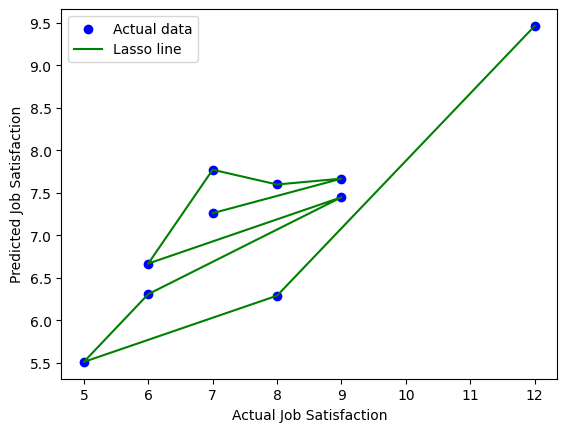

In [74]:
# Plot the actual vs. predicted values
plt.scatter(y_test, y_pred_lasso, color='blue', label='Actual data')
plt.plot(y_test, y_pred_lasso, color='green', label='Lasso line')
plt.xlabel('Actual Job Satisfaction')
plt.ylabel('Predicted Job Satisfaction')
plt.legend()
plt.show()

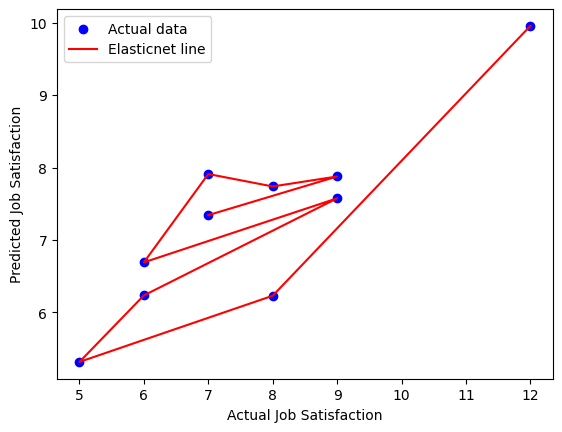

In [75]:
# Plot the actual vs. predicted values
plt.scatter(y_test, y_pred_elasticnet, color='blue', label='Actual data')
plt.plot(y_test, y_pred_elasticnet, color='red', label='Elasticnet line')
plt.xlabel('Actual Job Satisfaction')
plt.ylabel('Predicted Job Satisfaction')
plt.legend()
plt.show()

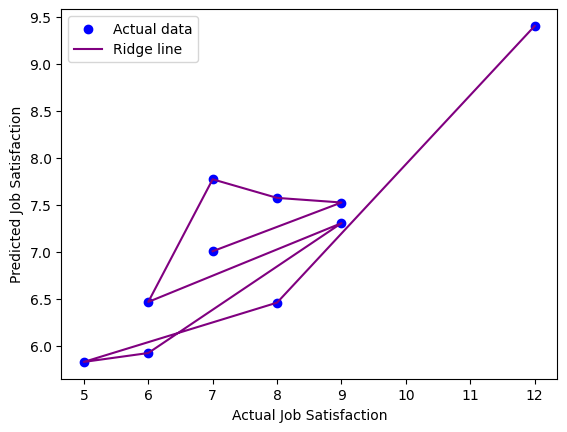

In [76]:
# Plot the actual vs. predicted values
plt.scatter(y_test, y_pred_ridge, color='blue', label='Actual data')
plt.plot(y_test, y_pred_ridge, color='purple', label='Ridge line')
plt.xlabel('Actual Job Satisfaction')
plt.ylabel('Predicted Job Satisfaction')
plt.legend()
plt.show()

Now model comparison

In [72]:
# Calculate MSE using testing
lasso_test_mse = mean_squared_error(y_test, y_pred_lasso)
ridge_test_mse = mean_squared_error(y_test, y_pred_ridge)
elasticnet_test_mse = mean_squared_error(y_test, y_pred_elasticnet)

In [73]:
print(f'Lasso Test MSE: {lasso_test_mse}')
print(f'Ridge Test MSE: {ridge_test_mse}')
print(f'ElasticNet Test MSE: {elasticnet_test_mse}')

Lasso Test MSE: 1.5183851723709831
Ridge Test MSE: 1.5871022985200427
ElasticNet Test MSE: 1.2254759024367927
